In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

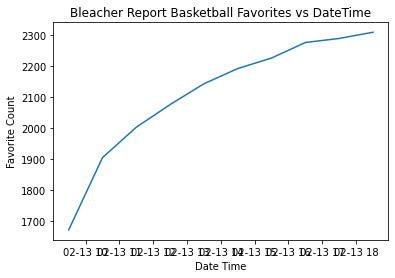

In [13]:
'''Date Time vs Favorites Cell'''

dataFrame_basketball = pd.read_csv('/Users/ch_kus/Desktop/basketball_1hr.csv')

dataFrame_basketball = dataFrame_basketball[0:10]

#define date as datetime column, parse the text to a datetime object
#change id to datetime column pd["Retweets"].plot()
#convert the string into datetime (string formatting for datetime)
dataFrame_basketball["DateTime"] = pd.to_datetime(dataFrame_basketball['DateTime'])
var = dataFrame_basketball["DateTime"]

%matplotlib inline
plt.title("Bleacher Report Basketball Favorites vs DateTime")
plt.xlabel("Date Time")
plt.ylabel("Favorite Count")
plt.plot(var, dataFrame_basketball.Favorites)

#x axis labeling (range of datetimes)

#plot only a section of graph 

#plot the differences (derivative) - different dataframe

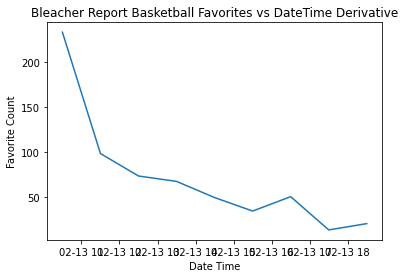

In [14]:
'''Derivative Graph (Favorites vs DateTime)'''

derivativeList = dataFrame_basketball.Favorites.diff()

%matplotlib inline
plt.title("Bleacher Report Basketball Favorites vs DateTime Derivative")
plt.xlabel("Date Time")
plt.ylabel("Favorite Count")
plt.plot(var, derivativeList)

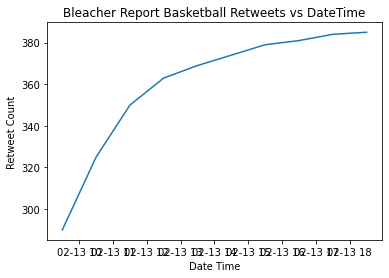

In [15]:
'''Favorites vs Retweets Data Graph'''

%matplotlib inline
plt.title("Bleacher Report Basketball Retweets vs DateTime")
plt.xlabel("Date Time")
plt.ylabel("Retweet Count")
plt.plot(var, dataFrame_basketball.Retweets)

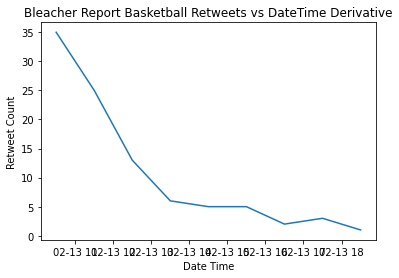

In [16]:
'''Derivative Graph (Retweets vs DateTime)'''

derivativeList_r = dataFrame_basketball.Retweets.diff()

%matplotlib inline
plt.title("Bleacher Report Basketball Retweets vs DateTime Derivative")
plt.xlabel("Date Time")
plt.ylabel("Retweet Count")
plt.plot(var, derivativeList_r)

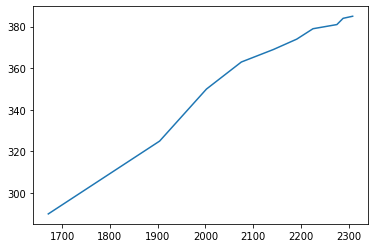

In [17]:
'''Favorites vs Retweets Data Graph'''

plt.plot(dataFrame_basketball.Favorites, dataFrame_basketball.Retweets)
#calculate correlation coefficient, find linear regressions, and confidence interval

#Find methods to compute Time series 

In [18]:
'''Calculating Pearson Correlation Cell'''

#calculates correlation (Note: try to be explicit)
dataFrame_basketball.corr(method ='pearson')  

,Favorites,Retweets
Favorites,1.000000,0.987756
Retweets,0.987756,1.000000


In [19]:
'''Calculating Slope Cell'''

X = dataFrame_basketball.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dataFrame_basketball.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #Y_pred stores the y coordinates of the line of best fit

#Play with the parameters

#Find the slove of red line and find the confidence interval

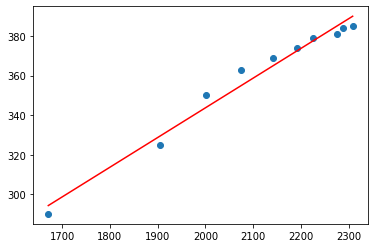

In [20]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [21]:
'''Calculating Slope annd Y-Intercept of Regression Line Cell'''

#Calculate slope by dividing the two calculated values (Y2-Y1) and (X2-X1)

print(linear_regressor.coef_[0][0])

#Calculate the Y-Intercept of line
print(linear_regressor.intercept_[0])

0.15046075181593144
42.813689096834935


In [22]:
from scipy import stats

import itertools
x = list(itertools.chain(*X))
y = list(itertools.chain(*Y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
confidence_interval = 2.58*std_err
confidence_interval

(slope-confidence_interval, slope+confidence_interval)

(0.12878424947404604, 0.17213725415781683)

In [28]:
derivativeList

0      NaN
1    233.0
2     98.0
3     73.0
4     67.0
5     49.0
6     34.0
7     50.0
8     13.0
9     20.0
Name: Favorites, dtype: float64

In [29]:
derivativeList_r

0     NaN
1    35.0
2    25.0
3    13.0
4     6.0
5     5.0
6     5.0
7     2.0
8     3.0
9     1.0
Name: Retweets, dtype: float64

In [31]:
dataFrame_basketball[5:10]

,DateTime,Favorites,Retweets
5,2021-02-13 14:30:00,2191,374
6,2021-02-13 15:30:00,2225,379
7,2021-02-13 16:30:00,2275,381
8,2021-02-13 17:30:00,2288,384
9,2021-02-13 18:30:00,2308,385


In [ ]:
#15:30:00 PM (3:30 PM) is where Favorites increases (2nd wave)
#16:30:00 PM (4:30 PM) is where Retweets increases (2nd wave)